# Decision Tree


In [17]:
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier , export_text , plot_tree
from sklearn.metrics import accuracy_score , confusion_matrix , recall_score , precision_score , f1_score , classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder #StandardScaler, MinMaxScaler , RobustScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("ML Decision Tree Resource.txt")

In [3]:
data.head()
data.info


<bound method DataFrame.info of        company                  job     degree  salary_more_then_50000
0     Reliance      sales executive  bachelors                       0
1     Reliance      sales executive    masters                       0
2     Reliance     business manager  bachelors                       1
3     Reliance     business manager    masters                       1
4     Reliance  computer programmer  bachelors                       0
5     Reliance  computer programmer    masters                       1
6      Torrent      sales executive    masters                       0
7      Torrent  computer programmer  bachelors                       0
8      Torrent     business manager  bachelors                       0
9      Torrent     business manager    masters                       1
10  Sun Pharma      sales executive  bachelors                       1
11  Sun Pharma      sales executive    masters                       1
12  Sun Pharma     business manager  bachelor

In [4]:
x = data.drop("salary_more_then_50000", axis=1)
y = data["salary_more_then_50000"]

In [5]:
encoder = LabelEncoder()

In [6]:
x = x.apply(encoder.fit_transform)

In [7]:
x

,company,job,degree
0,0,2,0
1,0,2,1
2,0,0,0
3,0,0,1
4,0,1,0
5,0,1,1
6,2,2,1
7,2,1,0
8,2,0,0
9,2,0,1


In [8]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [9]:
model = DecisionTreeClassifier()

In [10]:
model.fit(x_train , y_train)

DecisionTreeClassifier()

In [11]:
model.score(x_test , y_test)


0.75

In [12]:
model.score(x_train , y_train)

1.0

In [13]:
confusion_matrix(y_test , model.predict(x_test))

array([[2, 0],
       [1, 1]])

In [16]:
print(export_text(model , feature_names=list(x.columns)))

|--- company <= 1.50
|   |--- company <= 0.50
|   |   |--- job <= 0.50
|   |   |   |--- class: 1
|   |   |--- job >  0.50
|   |   |   |--- class: 0
|   |--- company >  0.50
|   |   |--- class: 1
|--- company >  1.50
|   |--- degree <= 0.50
|   |   |--- class: 0
|   |--- degree >  0.50
|   |   |--- job <= 1.00
|   |   |   |--- class: 1
|   |   |--- job >  1.00
|   |   |   |--- class: 0



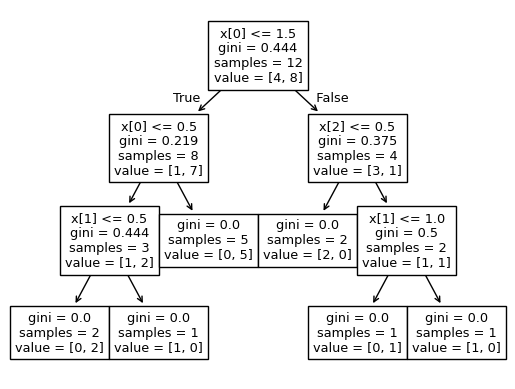

In [ ]:
plot_tree(model);